In [ ]:
# Install packages needed for imports below
# ! pip3 install wavio 
# ! pip3 install librosa
# ! pip3 install sounddevice
# had to install an earlier version of matplotlib in order to get the librosa waveshow function to work
# ! pip3 install matplotlib==3.7.3

In [1]:
# import necessary modules
import sounddevice as sd
from scipy.io.wavfile import write
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np
import time 

In [3]:
# Define Sampling Rate or Frequency in Hz
sr = 44100
# Output sample rate after wav file generation
sr_wav = 22050

# Record duration in seconds
duration = 5

# Main function to record audio in mono and save to wav file
def record(wav_path, sr):
    # Start audio recording
    recording = sd.rec(int(duration*sr), samplerate=sr, channels=1) #record with a mono channel microphone
   
    # Record audio for the given duration
    print("Recording... " + wav_path)
    sd.wait()
    
    # Write it to a wav file
    write(wav_path, sr, recording)

    # Create discrete array from wav file 
    wav, sr = librosa.load(wav_path)

    # Return original recording array and wav file array
    return recording[:,0], wav

# generates time domain representation of audio array
def generate_time_plot(array, plot_title):
    plt.figure(figsize=(14, 5))
    plt.title(plot_title + " Time Domain") # insert plot title based on function input
    plt.xlim(0, 5) # limit time frame from 0 to 5 seconds
    librosa.display.waveshow(array, sr=sr)
    plt.xlabel("Time (seconds)") 
    plt.ylabel("Amplitude")

# generates a spectrogram from the recorded audio array
def generate_spectrogram(array, sr_in, plot_title):
    freq = librosa.amplitude_to_db(np.abs(librosa.stft(array)), ref=np.max)
    fig, ax = plt.subplots()
    plt.ylim(0,8000) # limit frequencies plotted to between 0 and 8000 Hz
    plt.title(plot_title + " Spectrogram") # insert plot title based on function input
    img = librosa.display.specshow(freq, x_axis='time', y_axis='linear',ax=ax, sr=sr_in)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Frequency (Hertz)")
    fig.colorbar(img, ax=ax)

# Function takes a mono audio array and duplicates it produces a stereo array.
# The right channel array is then delayed and/or attenuated based on the input parameters
def delay_array(array, delay, delay_name, attenuation, attenuation_name):
    # delete the last x number of values in the array based on delay
    delete_elements = array[0:array.size-delay] 
    
    # pad the beginning of the array with zeros
    pad_zeros = np.pad(delete_elements, (delay, 0), 'constant') 
   
    # combine the original array with the delayed array
    delayed_array = np.hstack((array.reshape(-1,1), pad_zeros.reshape(-1,1)*attenuation)) 
    
    # if right array is only delayed, NOT attenuated, save with delay in file name
    if attenuation == 1: 
        filename = "team[]-stereosoundfile-[" + delay_name + "].wav" # 
    # if right array is delayed AND attenudated, save with delay and attenuation in file name
    else: 
        filename = "team[]-stereosoundfile-[" + delay_name + "]-[" + attenuation_name + "].wav"
    
    write(filename, sr, delayed_array) # write stereo array to a wave file

# Function runs the delay_array function for each desired delay and attenuation value requested in the project
def generate_files(array):
    # calculated number of samples to delay by for team member 1
    frank_samples = (0.202/ 343) * sr 
    
    # calculate number of samples to delay by for team member 2
    perrin_samples = (0.194/ 343) * sr
    
    # average team member samples together to get the average number of samples to delay by
    delay_avg = (frank_samples+perrin_samples)/2
    
    # desired delay values
    delay_list = [0, round(delay_avg), round(0.001*sr), round(0.01*sr), round(0.1*sr)] 
    
    # delay values formatted for wav file name
    delay_names = ["0ms", "avghead", "1ms", "10ms", "100ms"] 
   
    # run delay array function for each of the 5 delay values
    for x in range(5): 
        delay_array(array, delay_list[x], delay_names[x], 1, "")

    # desired attenuation values
    attenuation_list = [0.7, 0.5, 0.25] 
    
    # formatted for wave file name
    attenuation_names = ["-1.5dB", "-3dB", "-6dB"] 
    
    # run delay array function for each of the 3 attenuation values using 0ms and avghead delay
    for x in range(3): 
        delay_array(array, delay_list[0], delay_names[0], attenuation_list[x], attenuation_names[x])
        delay_array(array, delay_list[1], delay_names[1], attenuation_list[x], attenuation_names[x])


In [6]:
# Record the three phrases using record function and save to a wav file
recording1, wav1 = record("quick_brown_fox.wav", sr)
print("Done!\n")
time.sleep(3) # pause 3 seconds between recordings
recording2, wav2 = record("antique_ivory_buckles.wav", sr)
print("Done!\n")
time.sleep(3) # pause 3 seconds between recordings
recording3, wav3 = record("exquisite_opal_jewels.wav", sr)
print("Done!\n")

Recording... quick_brown_fox.wav
Done!

Recording... antique_ivory_buckles.wav
Done!

Recording... exquisite_opal_jewels.wav
Done!



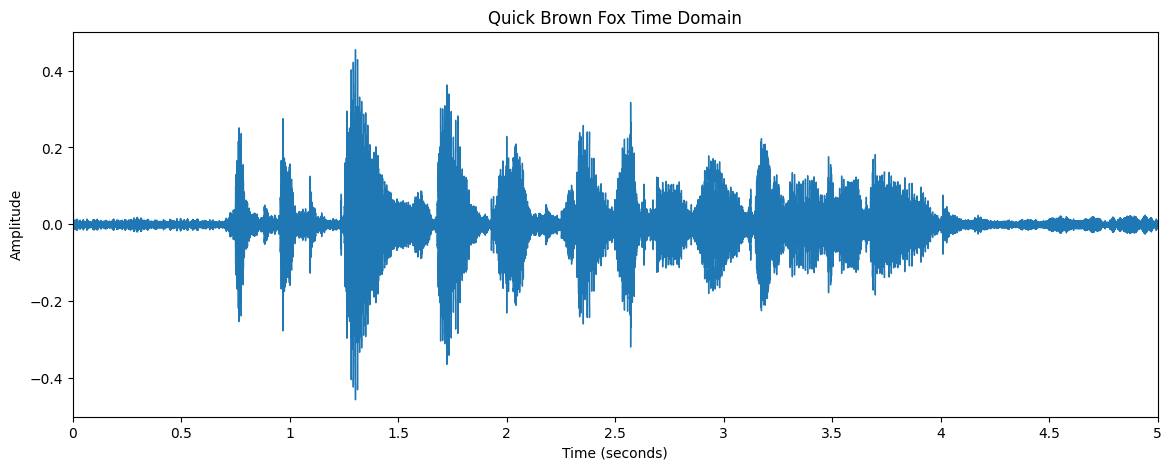

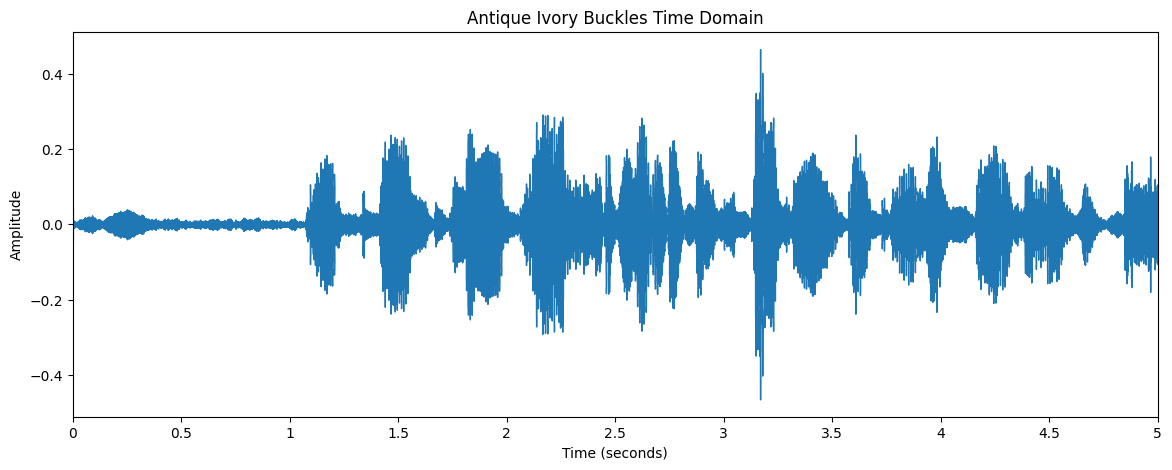

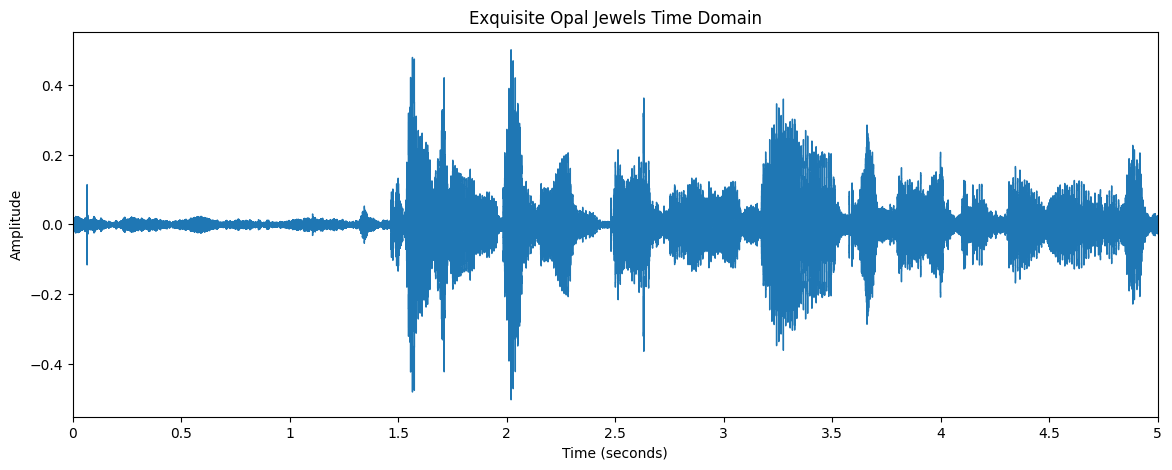

In [7]:
# Generate a Time Domain Plot for Each Recording
generate_time_plot(recording1, "Quick Brown Fox")
generate_time_plot(recording2, "Antique Ivory Buckles")
generate_time_plot(recording3, "Exquisite Opal Jewels")

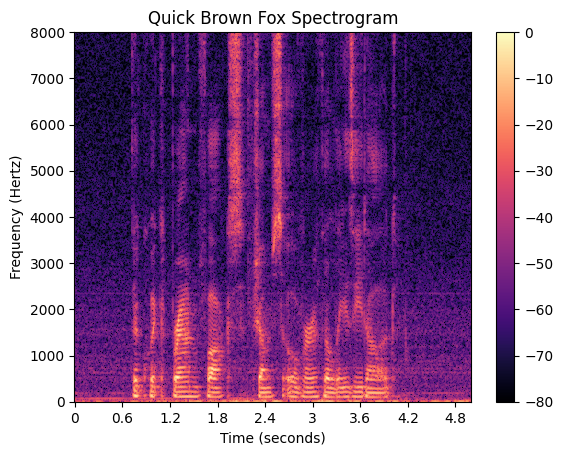

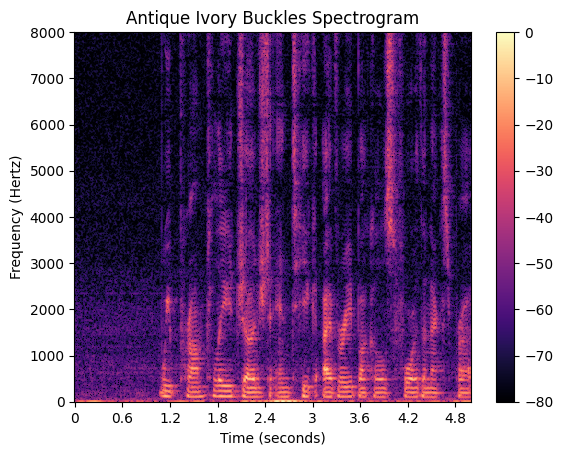

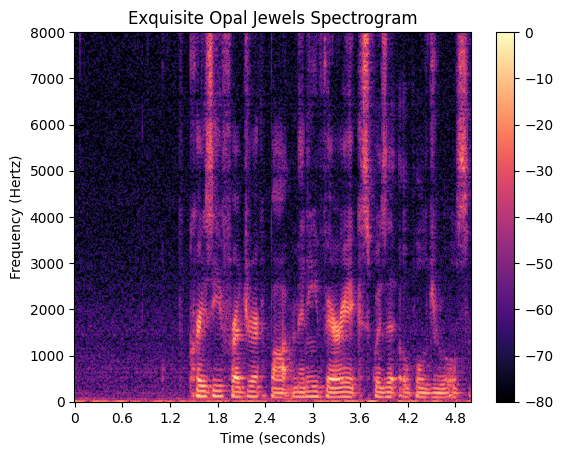

In [8]:
# Generate a Spectrogram for Each Recording
generate_spectrogram(recording1, sr, "Quick Brown Fox")
generate_spectrogram(recording2, sr, "Antique Ivory Buckles")
generate_spectrogram(recording3, sr, "Exquisite Opal Jewels")

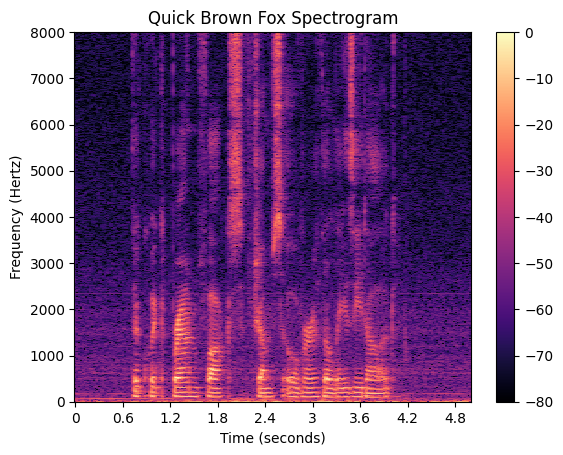

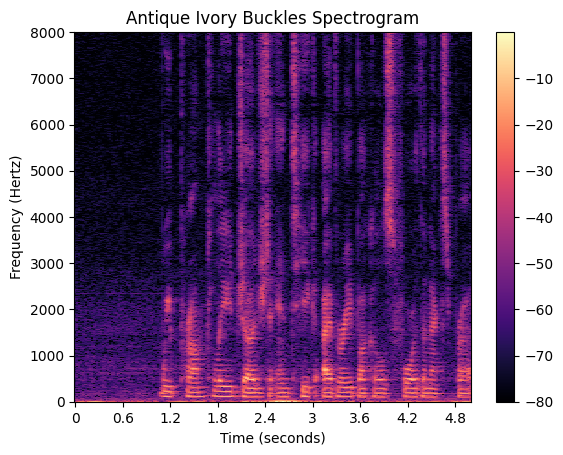

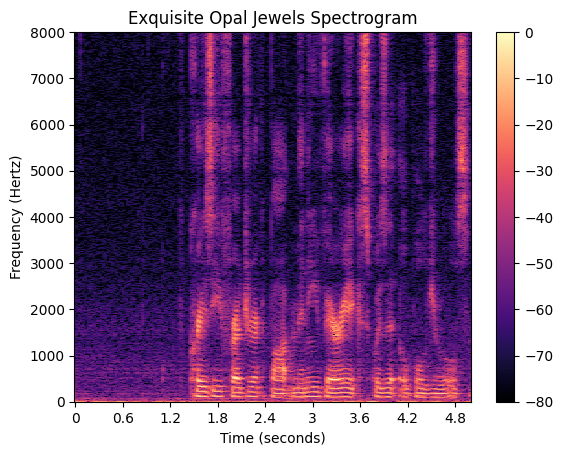

In [9]:
# Generate a Spectrogram for Each WAV File
generate_spectrogram(wav1, sr_wav, "Quick Brown Fox")
generate_spectrogram(wav2, sr_wav, "Antique Ivory Buckles")
generate_spectrogram(wav3, sr_wav, "Exquisite Opal Jewels")

In [10]:
# Generate delayed and attenuated wav files for one of the phrases
generate_files(recording1)